<a href="https://colab.research.google.com/github/adityacodes-root/AIML-Labs/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ K-Means clustering applied successfully!
Cluster
2    61
1    50
0    39
Name: count, dtype: int64


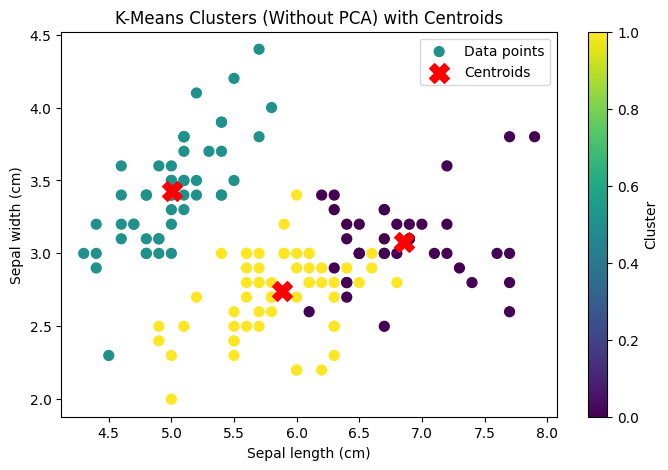

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
X['Cluster'] = kmeans.labels_

print("✅ K-Means clustering applied successfully!")
print(X['Cluster'].value_counts())

# Get centroids for the first two features
centroids = kmeans.cluster_centers_[:, :2]  # only Sepal length & width

# Visualize clusters and centroids
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', s=50, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')  # centroids
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("K-Means Clusters (Without PCA) with Centroids")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()


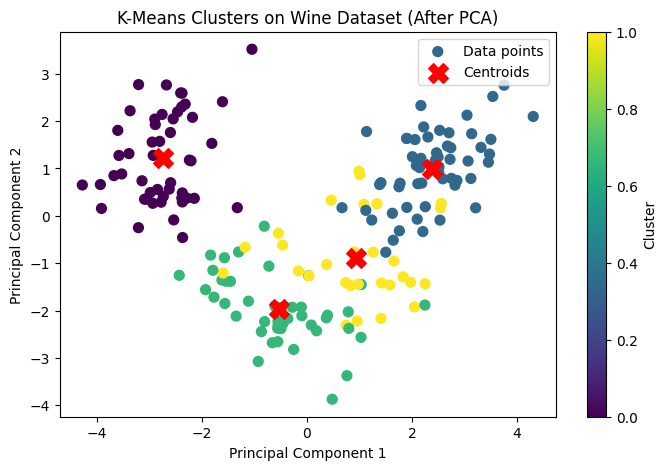

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 4. PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Transform centroids to PCA space
centroids = pca.transform(kmeans.cluster_centers_)

# 6. Plot clusters and centroids
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters on Wine Dataset (After PCA)")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()


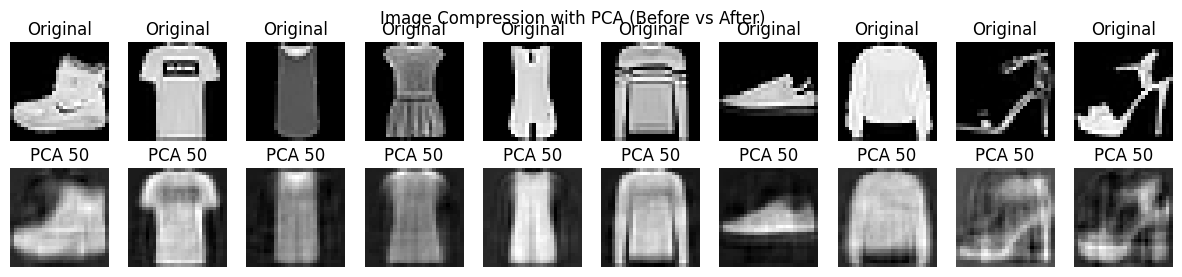

Explained Variance with 50 components: 82.76%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

# 1. Load dataset
(X_train, _), (_, _) = fashion_mnist.load_data()

# Use a small subset for speed
X_subset = X_train[:1000]
X_flat = X_subset.reshape(X_subset.shape[0], -1)

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# 3. Apply PCA with 50 components
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# 4. Reconstruct the images from PCA
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed = scaler.inverse_transform(X_reconstructed)
X_reconstructed = X_reconstructed.reshape(-1, 28, 28)

# 5. Visualize original vs reconstructed
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    # Original images
    axes[0, i].imshow(X_subset[i], cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # PCA Reconstructed images
    axes[1, i].imshow(X_reconstructed[i], cmap='gray')
    axes[1, i].set_title("PCA 50")
    axes[1, i].axis('off')

plt.suptitle("Image Compression with PCA (Before vs After)")
plt.show()

print(f"Explained Variance with 50 components: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")
